# Explore here

 PASO 1: Planteamiento del problema y recopilación de datos: 
 DUDA: cual es la prediccion que tenemos que hacer?

In [22]:
# Your code here
#
#descargar data

import requests
import pandas as pd
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
nombre_archivo = "AB_NYC_2019.csv"

respuesta = requests.get(url)

with open(nombre_archivo, 'wb') as archivo:
    archivo.write(respuesta.content)



In [23]:

import pandas as pd

total_data = pd.read_csv("../data/raw/AB_NYC_2019.csv")
total_data.shape



(48895, 16)

Paso 2: Exploración y limpieza de datos


In [24]:
# dimensiones

total_data.info()


# 10 variables numericas
# 6 variables categoricas
# dos variables con gran numero de NaaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [25]:
# buscar duplicados

total_data_sin = total_data.drop_duplicates()
total_data_sin.shape


## no hay duplicados

(48895, 16)

In [26]:
# Eliminar información irrelevante aunque no sabemos que problema se nos ha planteado. Lo mas logico seria eliminar las siguentes columnas
# id, host_id, host_name, calculated_host_listings_count
# tambien eliminamos las columnas con alto numero de NaN: last_review, reviews_per_month 

total_data.drop(['id', 'host_id', 'name', 'host_name', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis = 1, inplace = True)
total_data.shape
print(total_data.head())

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  availability_365  
0    149               1                  9               365  
1    225               1                 45               355  
2    150               3                  0               365  
3     89               1                270               194  
4     80              10                  9                 0  


Paso 3: Análisis de variables univariante. 
Análisis sobre variables categóricas

In [27]:
total_data.shape
total_data.columns
# total_data.info()

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365'],
      dtype='object')

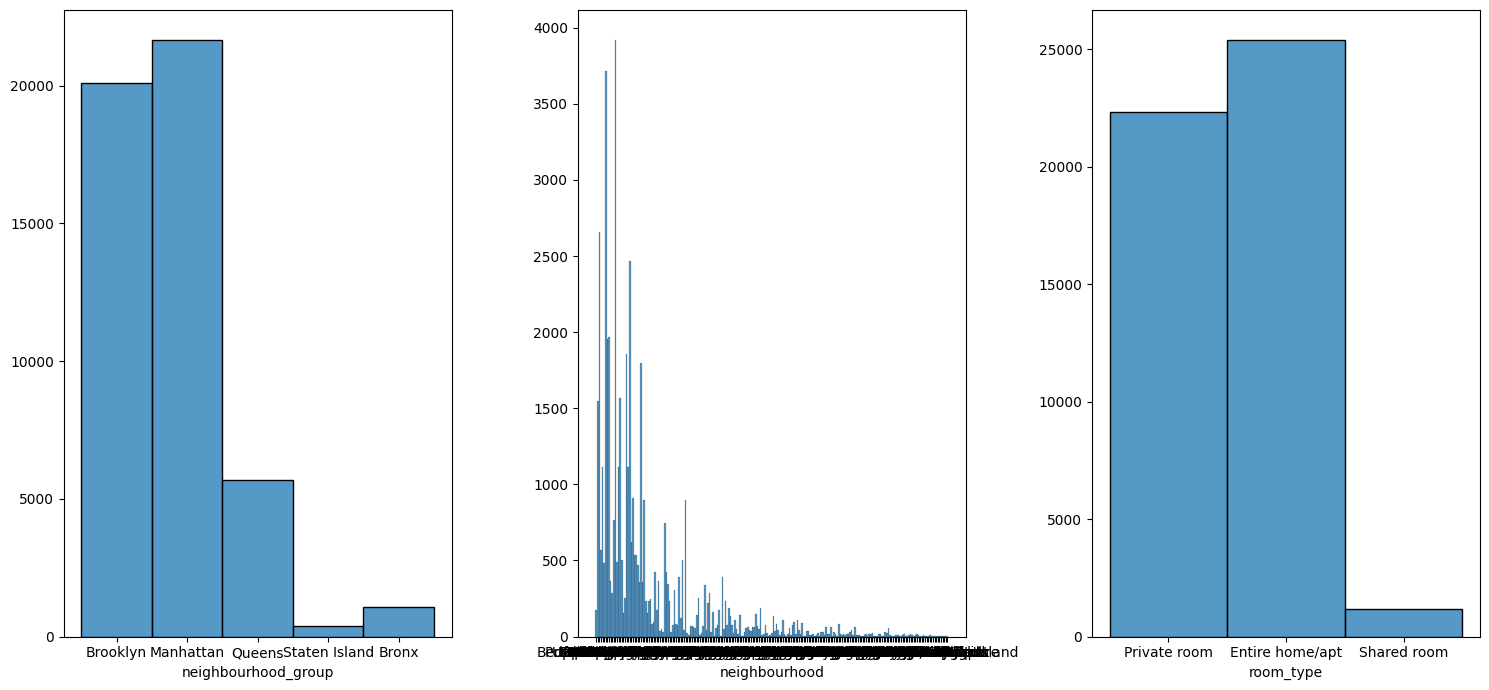

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns

# draw histograms

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.histplot(ax = axis[0], data = total_data, x="neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[1], data = total_data, x="neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data, x="room_type").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos determinar que: 

1. el mayor numero de sitios esta en Manhattan 
2. el mayor numero de sitios son apartamentos enteros
3. un grupo de barrios acumulan la mayor parte de los pisos 

Análisis sobre variables numéricas

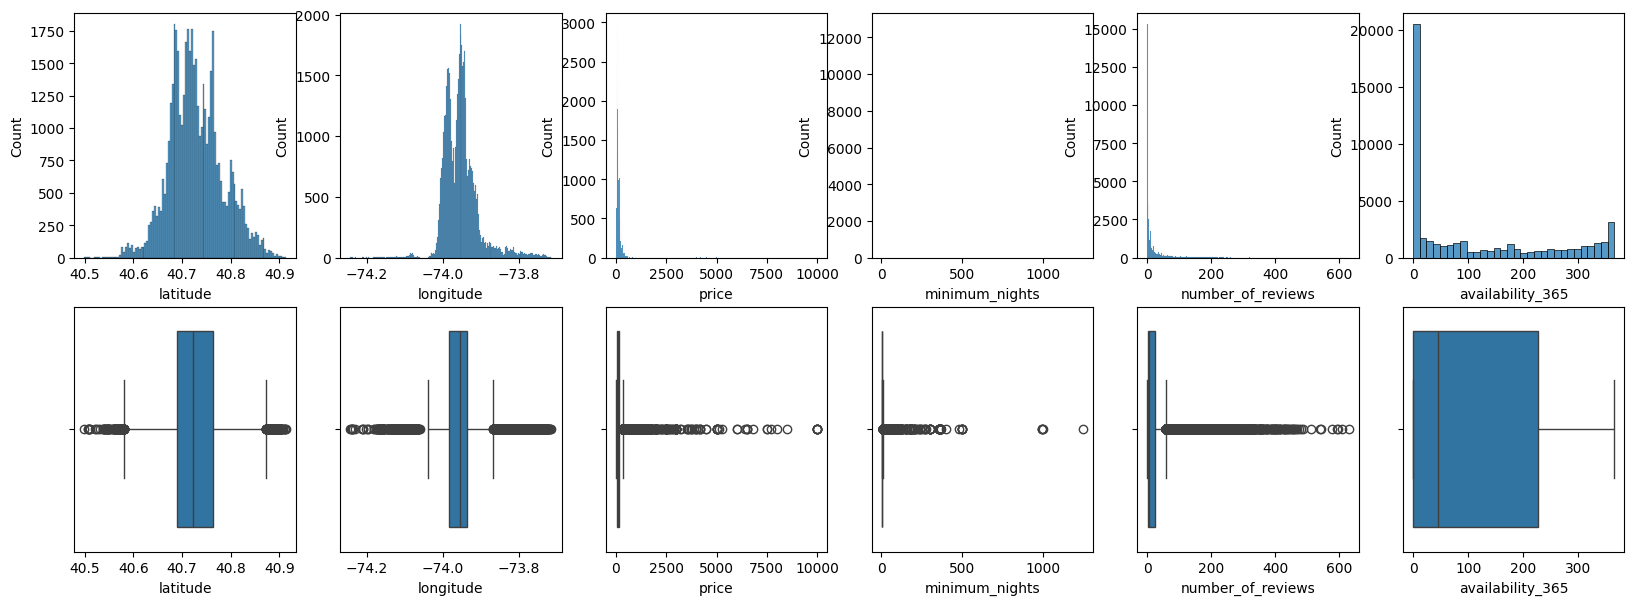

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 6, figsize = (20, 7))
sns.histplot(ax = axis[0, 0], data = total_data, x = "latitude")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "latitude")
sns.histplot(ax = axis[0, 1], data = total_data, x = "longitude")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "longitude")
sns.histplot(ax = axis[0, 2], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "price")
sns.histplot(ax = axis[0, 3], data = total_data, x = "minimum_nights")
sns.boxplot(ax = axis[1, 3], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[0, 4], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[1, 4], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[0, 5], data = total_data, x = "availability_365")
sns.boxplot(ax = axis[1, 5], data = total_data, x = "availability_365")

# Mostrar el gráfico
plt.show()

Dividir el conjunto en train y test 

In [30]:

from sklearn.model_selection import train_test_split

X = total_data[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
'availability_365']]  # Características (features)
y = total_data['price']  # Etiqueta (label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)